In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.neighbors as sn
import skimage.transform as skt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from skimage.feature import daisy, hog
import mahotas as mt

In [2]:
img_array = np.load('img_array.npy')
label_array = np.load('label_array.npy')


# Split to train and test

In [3]:
from sklearn.model_selection import train_test_split

#train, train_label
#test, test_label

train, test, train_label, test_label = train_test_split(img_array, label_array, test_size=0.2, random_state=7)

# Extract Feature (Train)

In [4]:
# Extrain feature to train

feature_1 = []
feature_2 = []

for img in train:

    # feature1 >> sobel + hog + radon
    filtY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    filtX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    outX = cv2.filter2D(img,-1,filtX,borderType=0)/112
    outY = cv2.filter2D(img,-1,filtY,borderType=0)/112
    img_1 = np.sqrt((outX**2)+(outY**2))

    _, img_1 = hog(img_1, orientations=20, pixels_per_cell=(10, 10),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)

    tta = np.linspace(0., 180., max(img.shape), endpoint=False, )
    img_1 = skt.radon(img_1, theta=tta)


    # feature2 >> LBP

    img_2 = mt.features.lbp(img, 10 ,5, ignore_zeros=False,)

    feature_1.append(np.array(img_1).reshape(-1,1))
    feature_2.append(np.array(img_2).reshape(-1,1))


feature_1 = np.array(feature_1).reshape(len(feature_1),-1)

feature_2 = np.array(feature_2).reshape(len(feature_2),-1)

feature_Tr = np.concatenate((feature_1, feature_2), axis=1)



C:\Users\Tunwongchai\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


# Train

In [5]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',)
clf_svm.fit(feature_Tr, train_label)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [6]:
clf_nab = GaussianNB()
clf_nab.fit(feature_Tr, train_label)

GaussianNB()

In [7]:
clf_knn = sn.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_knn.fit(feature_Tr, train_label)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# Extact Feature (Test)

In [8]:
# Extrain feature to test

feature_1 = []
feature_2 = []

for img in test:

    # feature1 >> sobel + hog + radon
    filtY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    filtX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    outX = cv2.filter2D(img,-1,filtX,borderType=0)/112
    outY = cv2.filter2D(img,-1,filtY,borderType=0)/112
    img_1 = np.sqrt((outX**2)+(outY**2))

    _, img_1 = hog(img_1, orientations=20, pixels_per_cell=(10, 10),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)

    tta = np.linspace(0., 180., max(img.shape), endpoint=False, )
    img_1 = skt.radon(img_1, theta=tta)


    # feature2 >> LBP

    img_2 = mt.features.lbp(img, 10 ,5, ignore_zeros=False,)

    feature_1.append(np.array(img_1).reshape(-1,1))
    feature_2.append(np.array(img_2).reshape(-1,1))


feature_1 = np.array(feature_1).reshape(len(feature_1),-1)

feature_2 = np.array(feature_2).reshape(len(feature_2),-1)

feature_Ts = np.concatenate((feature_1, feature_2), axis=1)



C:\Users\Tunwongchai\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


# Predict and Result

In [9]:
pred_knn = clf_knn.predict(feature_Ts)
pred_svm = clf_svm.predict(feature_Ts)
pred_nab = clf_nab.predict(feature_Ts)

In [10]:
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(test_label, pred_knn),2)
score_svm = round(accuracy_score(test_label, pred_svm),2)
score_nab = round(accuracy_score(test_label, pred_nab),2)

print("KNN Model Accuracy:", score_knn)
print("SVM Model Accuracy:", score_svm)
print("Naive Bayes Model Accuracy:", score_nab)


KNN Model Accuracy: 0.19
SVM Model Accuracy: 0.59
Naive Bayes Model Accuracy: 0.27


In [ ]:
from sklearn.metrics import classification_report

report_svm = classification_report(test_label, pred_svm, target_names=clf_svm.classes_)
print(report_svm)

              precision    recall  f1-score   support

      Bishop       0.52      0.60      0.56        20
        King       0.50      0.67      0.57        15
      Knight       0.75      0.90      0.82        20
        Pawn       0.67      0.43      0.53        23
       Queen       0.36      0.33      0.34        15
        Rook       0.67      0.56      0.61        18

    accuracy                           0.59       111
   macro avg       0.58      0.58      0.57       111
weighted avg       0.59      0.59      0.58       111



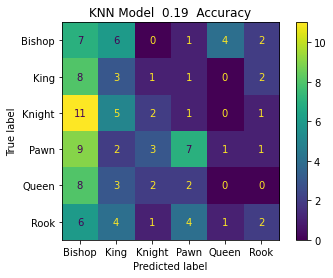

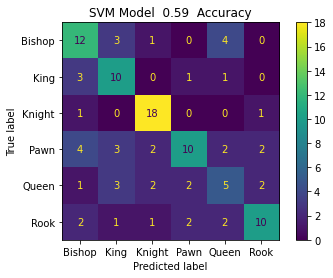

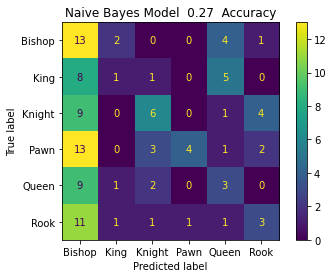

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(test_label, pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)

cm_knn = confusion_matrix(test_label, pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_)

cm_nab = confusion_matrix(test_label, pred_nab)
disp_nab = ConfusionMatrixDisplay(confusion_matrix=cm_nab, display_labels=clf_nab.classes_)

disp_knn.plot()
disp_knn.ax_.set_title('KNN Model  '+str(score_knn)+'  Accuracy')

disp_svm.plot()
disp_svm.ax_.set_title('SVM Model  '+str(score_svm)+'  Accuracy')

disp_nab.plot()
disp_nab.ax_.set_title('Naive Bayes Model  '+str(score_nab)+'  Accuracy')

plt.show()

In [ ]:
# plot true img
plt.figure(figsize=(20,20),facecolor='white')
i = 1
for idx, input, prediction, label in zip(enumerate(test), test, pred_svm, test_label):

    if prediction == label:
        # print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label) 
        plt.subplot(10,7,i)
        plt.xticks([])
        plt.yticks([])
        
        plt.imshow(input, cmap='gray')
        plt.xlabel('Pred:'+ str(prediction)+ '  True: '+ str(label), )
        i += 1

In [ ]:
#plot wrong img
plt.figure(figsize=(20,20), facecolor='white')
i = 1
for idx, input, prediction, label in zip(enumerate(test), test, pred_svm, test_label):

    if prediction != label:
        # print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label) 
        plt.subplot(9,6,i)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(input, cmap='gray')
        plt.xlabel('Pred:'+ str(prediction)+ '  True: '+ str(label), )
        i += 1